# **CAR PRICE PREDICTION**


# 1. Introduction

- Analyze the data and predict car prices based on attributes such as car age, fuel type, kilometers driven, etc., to understand the market segments.  

- Set objectives:  
    - Identify key factors influencing car prices.  
    - Build a model to accurately predict car prices.

# 2. Understanding the Data

## 2.1 Load the Data  


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
import os
import joblib

In [111]:
raw_df1 = pd.read_csv('raw_csv/cardekho.csv')
raw_df2 = pd.read_csv('raw_csv/train.csv')
raw_df3 = pd.read_csv('raw_csv/processes2.csv')


## 2.2 Display and Describe Attributes, Number of Records  

In [112]:
print(raw_df1.shape)
raw_df1.head()

(8128, 12)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [113]:
print(raw_df2.shape)
raw_df2.head()

(5847, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [114]:
print(raw_df3.shape)
raw_df3.head()

(2095, 14)


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


# 3. Data Preprocessing

## 3.1 Standardize Column Names, Data Types, and Units  

In [115]:
# Defind the correct order of columns
correct_order = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']

In [116]:
raw_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [117]:
raw_df1 = raw_df1[(raw_df1['fuel']!='CNG') & (raw_df1['fuel']!='LPG') & (raw_df1['owner']!='Test Drive Car')]
raw_df1['owner'] = raw_df1['owner'].str.replace(' Owner','',regex=True)
raw_df1['name'] = raw_df1['name'].str.split().str[0]
raw_df1['selling_price'] = raw_df1['selling_price'] / 100000.0

In [118]:
column_mapping_df1 = {
    "mileage(km/ltr/kg)": "mileage"
}
raw_df1 = raw_df1.drop(columns=['seller_type'])
raw_df1.rename(columns=column_mapping_df1, inplace=True)
print(raw_df1.columns)
raw_df1.head()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Manual,First,23.40,1248.0,74,5.0
1,Skoda,2014,3.70,120000,Diesel,Manual,Second,21.14,1498.0,103.52,5.0
2,Honda,2006,1.58,140000,Petrol,Manual,Third,17.70,1497.0,78,5.0
3,Hyundai,2010,2.25,127000,Diesel,Manual,First,23.00,1396.0,90,5.0
4,Maruti,2007,1.30,120000,Petrol,Manual,First,16.10,1298.0,88.2,5.0


In [119]:
raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [120]:
raw_df2 = raw_df2[raw_df2['Fuel_Type']!='Electric']
raw_df2['Engine'] = raw_df2['Engine'].str.extract('(\d+)')
raw_df2['Power'] = raw_df2['Power'].str.extract('(\d+)')
raw_df2['Mileage'] = raw_df2['Mileage'].str.extract('(\d+)')
raw_df2 = raw_df2[~raw_df2['Mileage'].str.contains('km/kg', na=False)]
raw_df2['Name'] = raw_df2['Name'].str.split(' ').str[0]
raw_df2.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19,1582,126,5.0,NaN,12.50
1,2,Honda,Chennai,2011,46000,Petrol,Manual,First,13,1199,88,5.0,8.61 Lakh,4.50
2,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20,1248,88,7.0,NaN,6.00
3,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,140,5.0,NaN,17.74
4,6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23,1461,63,5.0,NaN,3.50


In [121]:
column_mapping_df2 = {
    "Year": "year",
    "Kilometers_Driven": "km_driven",
    "Fuel_Type": "fuel",
    "Transmission": "transmission",
    "Mileage": "mileage",
    "Engine": "engine",
    "Power": "max_power",
    "Seats": "seats",
    "Price": "selling_price",
    "Name": "name",
    "Owner_Type": "owner"
}
raw_df2 = raw_df2.drop(columns=['New_Price', 'Location','Unnamed: 0'])
raw_df2.rename(columns=column_mapping_df2, inplace=True)
raw_df2 = raw_df2[correct_order]
raw_df2.info()
raw_df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 0 to 5846
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5845 non-null   object 
 1   year           5845 non-null   int64  
 2   selling_price  5845 non-null   float64
 3   km_driven      5845 non-null   int64  
 4   fuel           5845 non-null   object 
 5   transmission   5845 non-null   object 
 6   owner          5845 non-null   object 
 7   mileage        5845 non-null   object 
 8   engine         5809 non-null   object 
 9   max_power      5809 non-null   object 
 10  seats          5807 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 548.0+ KB


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Hyundai,2015,12.50,41000,Diesel,Manual,First,19,1582,126,5.0
1,Honda,2011,4.50,46000,Petrol,Manual,First,13,1199,88,5.0
2,Maruti,2012,6.00,87000,Diesel,Manual,First,20,1248,88,7.0
3,Audi,2013,17.74,40670,Diesel,Automatic,Second,15,1968,140,5.0
4,Nissan,2013,3.50,86999,Diesel,Manual,First,23,1461,63,5.0


In [122]:
raw_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [123]:
raw_df3 = raw_df3[(raw_df3['fuel']!='CNG') & (raw_df3['fuel']!='LPG') & (raw_df3['owner']!='Test Drive Car')]
raw_df3['owner'] = raw_df3['owner'].str.replace(' Owner','',regex=True)
raw_df3['selling_price'] = raw_df3['selling_price'] / 100000.0
print(raw_df3['fuel'].unique())
print(raw_df3['owner'].unique())
raw_df3.head()

['Diesel' 'Petrol']
['First' 'Second' 'Third' 'Fourth & Above']


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,4.50,145500,Diesel,Individual,Manual,First,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,2.25,127000,Diesel,Individual,Manual,First,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,4.40,45000,Petrol,Individual,Manual,First,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,3.50,90000,Diesel,Individual,Manual,First,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,2.00,169000,Diesel,Individual,Manual,First,5,68.10,kmpl,20.00,1399


In [124]:
column_mapping_df3 = {
    "max_power (in bph)": "max_power",
    "Mileage": "mileage",
    "Engine (CC)": "engine"
}
raw_df3 = raw_df3.drop(columns=['seller_type', 'Mileage Unit', 'Unnamed: 0'])
raw_df3.rename(columns=column_mapping_df3, inplace=True)
raw_df3 = raw_df3[correct_order]

In [125]:
def plot_histograms(df, columns, figsize=(15, 12), bins_method='sqrt'):
    """
    Plot histograms for continuous columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to plot histograms for.
        figsize (tuple): Figure size (default is (15, 12)).
        bins_method (str): Method for calculating bins using numpy.histogram_bin_edges() (default is 'sqrt').

    Returns:
        None (Displays the plots).
    """
    plt.figure(figsize=figsize)

    for index, col in enumerate(columns):
        plt.subplot(2, 2, index + 1)
        
        # Convert column to numeric type, removing invalid values
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Compute bin edges using the specified method
        bin_edges = np.histogram_bin_edges(data, bins=bins_method)
        num_bins = len(bin_edges) - 1  # Actual number of bins
        
        # Plot histogram with the calculated number of bins
        sns.histplot(data=data, bins=num_bins, color=sns.color_palette('pastel')[index], kde=True)
        
        plt.title(col.replace('_', ' ').capitalize(), fontsize=14, pad=10)
        plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.show()


In [126]:
continuous_raw_columns = ['km_driven', 'mileage', 'engine', 'max_power']

In [127]:
raw_df1.info()
raw_df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   transmission   8028 non-null   object 
 6   owner          8028 non-null   object 
 7   mileage        7814 non-null   float64
 8   engine         7814 non-null   float64
 9   max_power      7820 non-null   object 
 10  seats          7814 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 752.6+ KB


,year,selling_price,km_driven,mileage,engine,seats
count,8028.000000,8028.000000,8.028000e+03,7814.000000,7814.000000,7814.000000
mean,2013.815521,6.403937,6.977314e+04,19.391962,1462.914640,5.421551
std,4.030836,8.027015,5.664419e+04,4.001972,504.759742,0.963125
min,1983.000000,0.299990,1.000000e+03,0.000000,624.000000,2.000000
25%,2011.000000,2.600000,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.800000,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,100.000000,2.360457e+06,42.000000,3604.000000,14.000000


In [128]:
raw_df2.info()
raw_df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 0 to 5846
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5845 non-null   object 
 1   year           5845 non-null   int64  
 2   selling_price  5845 non-null   float64
 3   km_driven      5845 non-null   int64  
 4   fuel           5845 non-null   object 
 5   transmission   5845 non-null   object 
 6   owner          5845 non-null   object 
 7   mileage        5845 non-null   object 
 8   engine         5809 non-null   object 
 9   max_power      5809 non-null   object 
 10  seats          5807 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 548.0+ KB


,year,selling_price,km_driven,seats
count,5845.000000,5845.000000,5.845000e+03,5807.000000
mean,2013.448417,9.652640,5.841404e+04,5.286551
std,3.195161,11.277737,9.239526e+04,0.806790
min,1998.000000,0.440000,1.710000e+02,2.000000
25%,2012.000000,3.550000,3.345000e+04,5.000000
50%,2014.000000,5.750000,5.260000e+04,5.000000
75%,2016.000000,10.250000,7.249500e+04,5.000000
max,2019.000000,160.000000,6.500000e+06,10.000000


In [129]:
raw_df3.info()
raw_df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2074 entries, 0 to 2094
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2074 non-null   object 
 1   year           2074 non-null   int64  
 2   selling_price  2074 non-null   float64
 3   km_driven      2074 non-null   int64  
 4   fuel           2074 non-null   object 
 5   transmission   2074 non-null   object 
 6   owner          2074 non-null   object 
 7   mileage        2074 non-null   float64
 8   engine         2074 non-null   int64  
 9   max_power      2074 non-null   float64
 10  seats          2074 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 194.4+ KB


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Manual,First,23.40,1248,74.00,5
1,Hyundai,2010,2.25,127000,Diesel,Manual,First,23.00,1396,90.00,5
2,Hyundai,2017,4.40,45000,Petrol,Manual,First,20.14,1197,81.86,5
3,Toyota,2011,3.50,90000,Diesel,Manual,First,23.59,1364,67.10,5
4,Ford,2013,2.00,169000,Diesel,Manual,First,20.00,1399,68.10,5


## 3.2 Merge and Save Data

In [130]:
# Merge 3 datasets
merged_df = pd.concat([raw_df1, raw_df2, raw_df3], ignore_index=True)

# Export to CSV file
saved_file_path = 'raw_csv/merged_dataset.csv'
merged_df.to_csv(saved_file_path, index=False)

# Print message
print(f"Merged and saved to '{saved_file_path}'")

Merged and saved to 'raw_csv/merged_dataset.csv'


## 3.3 Handle Incorrect and Missing Values

In [131]:
# Load merge data
merged_df = pd.read_csv(saved_file_path)
print(merged_df.shape)
merged_df.head()

(15947, 11)


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Manual,First,23.40,1248.0,74.00,5.0
1,Skoda,2014,3.70,120000,Diesel,Manual,Second,21.14,1498.0,103.52,5.0
2,Honda,2006,1.58,140000,Petrol,Manual,Third,17.70,1497.0,78.00,5.0
3,Hyundai,2010,2.25,127000,Diesel,Manual,First,23.00,1396.0,90.00,5.0
4,Maruti,2007,1.30,120000,Petrol,Manual,First,16.10,1298.0,88.20,5.0


In [132]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15947 entries, 0 to 15946
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           15947 non-null  object 
 1   year           15947 non-null  int64  
 2   selling_price  15947 non-null  float64
 3   km_driven      15947 non-null  int64  
 4   fuel           15947 non-null  object 
 5   transmission   15947 non-null  object 
 6   owner          15947 non-null  object 
 7   mileage        15733 non-null  float64
 8   engine         15697 non-null  float64
 9   max_power      15703 non-null  float64
 10  seats          15695 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,15947.000000,15947.000000,1.594700e+04,15733.000000,15697.000000,15703.000000,15695.000000
mean,2013.708848,7.317741,6.530429e+04,19.038960,1491.325285,97.953659,5.328703
std,3.654452,9.130975,7.067008e+04,4.080677,536.029927,43.934431,0.861552
min,1983.000000,0.299990,1.710000e+02,0.000000,624.000000,0.000000,2.000000
25%,2012.000000,2.915000,3.468700e+04,16.300000,1197.000000,70.000000,5.000000
50%,2014.000000,4.800000,5.900000e+04,19.330000,1364.000000,85.800000,5.000000
75%,2016.000000,7.450000,8.583650e+04,22.000000,1598.000000,110.000000,5.000000
max,2020.000000,160.000000,6.500000e+06,42.000000,5998.000000,560.000000,14.000000


In [133]:
# Take copy from data to make processes on
preprocessed_df = deepcopy(merged_df)

# Show all types of columns in the data
preprocessed_df.dtypes

name              object
year               int64
selling_price    float64
km_driven          int64
fuel              object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [134]:
# Check about none values in data to decide if we will make data cleaning or not
preprocessed_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          214
engine           250
max_power        244
seats            252
dtype: int64

In [135]:
print("Count of zero values per column:\n", (preprocessed_df == 0).sum())

Count of zero values per column:
 name              0
year              0
selling_price     0
km_driven         0
fuel              0
transmission      0
owner             0
mileage          57
engine            0
max_power         6
seats             0
dtype: int64


In [136]:
# Handling zero values
cols_to_replace_zeros = ['mileage', 'max_power']
preprocessed_df[cols_to_replace_zeros] = preprocessed_df[cols_to_replace_zeros].replace(0, np.nan)

In [137]:
# Handle missing values of float columns that are mileage, engine, seats
column_float_imputed = ['mileage', 'engine', 'max_power']
preprocessed_df[column_float_imputed] = preprocessed_df[column_float_imputed].fillna(preprocessed_df[column_float_imputed].mean())

# Handle missing values of seats column 
preprocessed_df['seats'] = preprocessed_df['seats'].fillna(preprocessed_df['seats'].mode()[0])


In [138]:
# Check if there is any missing values in the dataset
print("Count of Null values per column:\n", preprocessed_df.isnull().sum())
print("Count of zero values per column:\n", (preprocessed_df == 0).sum())

Count of Null values per column:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
Count of zero values per column:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


## 3.3 Handle textual columns

In [139]:
# Show all textual columns in the dataset
textual_columns = preprocessed_df.select_dtypes(include = ['object']).columns
preprocessed_df[textual_columns]

,name,fuel,transmission,owner
0,Maruti,Diesel,Manual,First
1,Skoda,Diesel,Manual,Second
2,Honda,Petrol,Manual,Third
3,Hyundai,Diesel,Manual,First
4,Maruti,Petrol,Manual,First
...,...,...,...,...
15942,Maruti,Petrol,Manual,First
15943,Toyota,Diesel,Manual,First
15944,Maruti,Petrol,Manual,First
15945,Maruti,Petrol,Manual,First


In [140]:
## Label encoding textual columns

# Dictionary to store the encoders
label_encoders = {}

# Fit and transform each textual column, saving the encoders
for col in textual_columns:
    label_encoder = LabelEncoder()
    preprocessed_df[col] = label_encoder.fit_transform(preprocessed_df[col])
    label_encoders[col] = label_encoder

preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,23,2014,4.50,145500,0,1,0,23.40,1248.0,74.00,5.0
1,32,2014,3.70,120000,0,1,2,21.14,1498.0,103.52,5.0
2,11,2006,1.58,140000,1,1,3,17.70,1497.0,78.00,5.0
3,12,2010,2.25,127000,0,1,0,23.00,1396.0,90.00,5.0
4,23,2007,1.30,120000,1,1,0,16.10,1298.0,88.20,5.0


In [141]:
# Check about if there is any extra textual columns
preprocessed_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

## 3.4 Handle outliers

name            -0.015550
year            -0.950981
km_driven       50.551949
fuel             0.166768
transmission    -1.674586
owner            1.140772
mileage         -0.149842
engine           1.452807
max_power        2.196668
seats            2.178515
dtype: float64


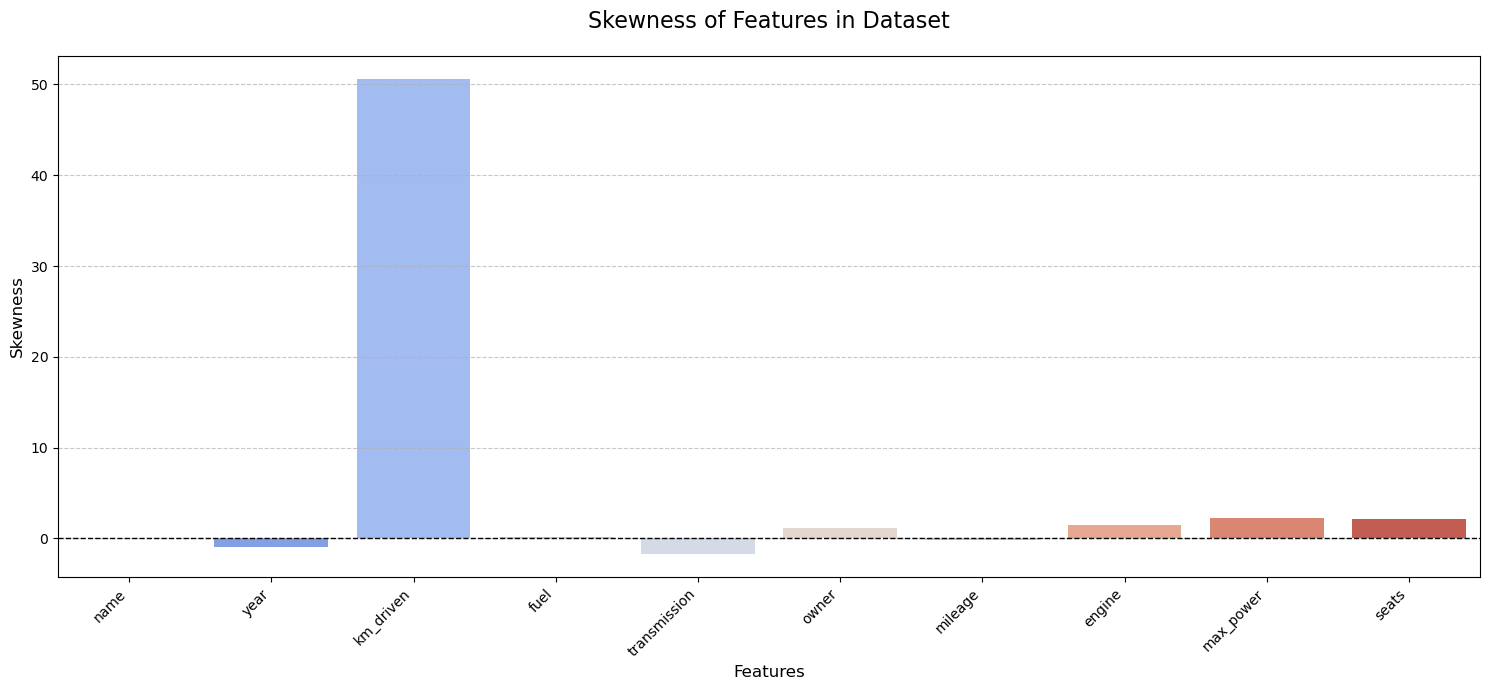

In [142]:
def plot_feature_skewness(df, target_column="selling_price"):
    """
    Plots the skewness of numerical features in the dataset.
    
    Parameters:
        df (pd.DataFrame): Preprocessed dataframe.
        target_column (str): The target column to exclude from skewness calculation.
    """
    # Remove target column
    column_skewed = df.columns.drop(target_column)
    
    # Compute skewness
    skewness = df[column_skewed].skew()
    print(skewness)

    # Plot skewness as a bar chart
    plt.figure(figsize=(15, 7))
    sns.barplot(x=column_skewed, y=skewness, hue=column_skewed, palette='coolwarm')

    plt.title('Skewness of Features in Dataset', fontsize=16, pad=20)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Skewness', fontsize=12)

    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_feature_skewness(preprocessed_df)


In [143]:
# Handle skewness of km driven columns by taking the log function for it
preprocessed_df['km_driven'] = np.log(preprocessed_df['km_driven'] + 1)

# Find skewness for km driven column after we handled it
preprocessed_df['km_driven'].skew()

np.float64(-1.1196458277117767)

name           -0.015550
year           -0.950981
km_driven      -1.119646
fuel            0.166768
transmission   -1.674586
owner           1.140772
mileage        -0.149842
engine          1.452807
max_power       2.196668
seats           2.178515
dtype: float64


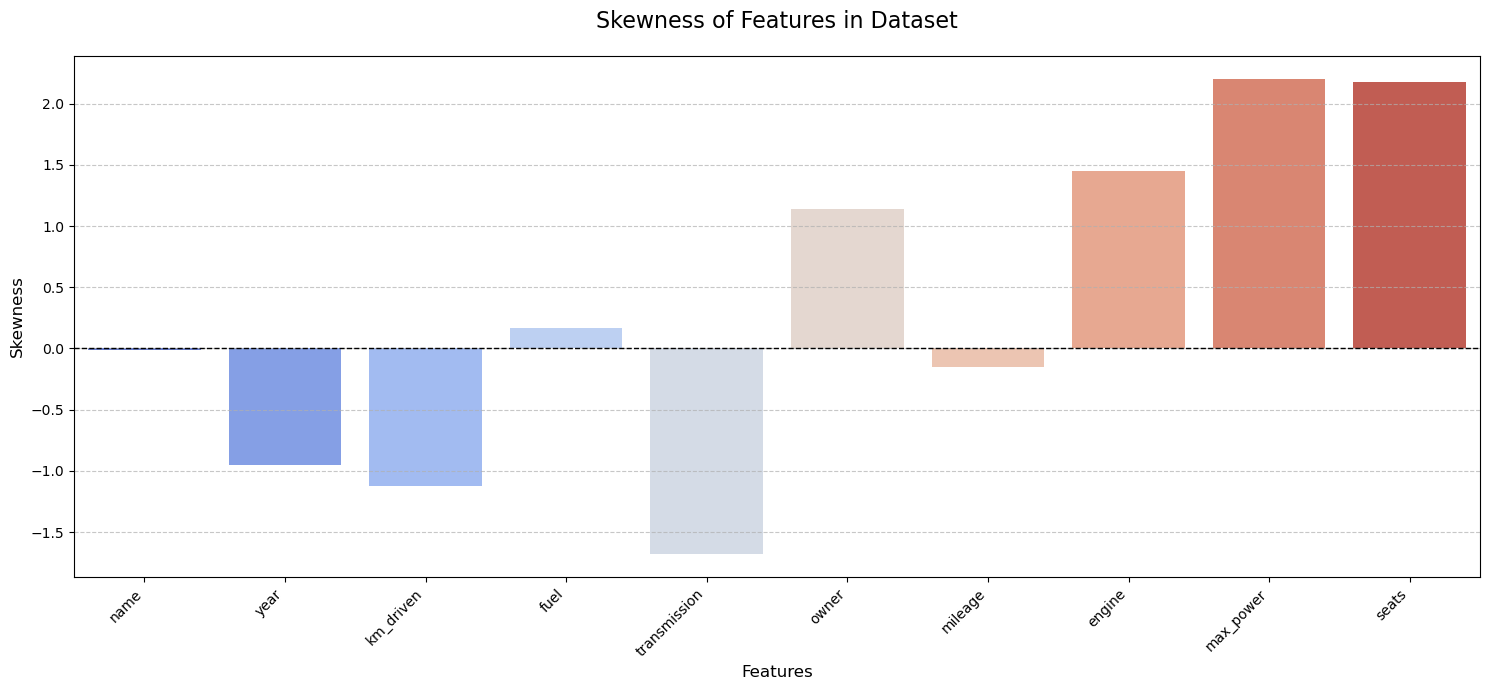

In [144]:
plot_feature_skewness(preprocessed_df)

In [145]:
preprocessed_df.info()
preprocessed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15947 entries, 0 to 15946
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           15947 non-null  int64  
 1   year           15947 non-null  int64  
 2   selling_price  15947 non-null  float64
 3   km_driven      15947 non-null  float64
 4   fuel           15947 non-null  int64  
 5   transmission   15947 non-null  int64  
 6   owner          15947 non-null  int64  
 7   mileage        15947 non-null  float64
 8   engine         15947 non-null  float64
 9   max_power      15947 non-null  float64
 10  seats          15947 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,23,2014,4.50,11.887938,0,1,0,23.40,1248.0,74.00,5.0
1,32,2014,3.70,11.695255,0,1,2,21.14,1498.0,103.52,5.0
2,11,2006,1.58,11.849405,1,1,3,17.70,1497.0,78.00,5.0
3,12,2010,2.25,11.751950,0,1,0,23.00,1396.0,90.00,5.0
4,23,2007,1.30,11.695255,1,1,0,16.10,1298.0,88.20,5.0


## 3.5 Save the preprocessed data and label encoder

In [146]:
processed_data_dir = "processed_data"
saved_processed_data_path = os.path.join(processed_data_dir, "preprocessed_dataset.csv")
saved_label_encoders_path = os.path.join(processed_data_dir, "label_encoders.sav")
os.makedirs(processed_data_dir, exist_ok=True)

# Save preprocessed DataFrame
preprocessed_df.to_csv(saved_processed_data_path, index=False)

# Save label encoders
joblib.dump(label_encoders, saved_label_encoders_path)

['processed_data\\label_encoders.sav']

# 4. Statistical Analysis and Model Building on Processed Data

## 4.1 Load the Processed Data

In [147]:
preprocessed_df = pd.read_csv(saved_processed_data_path)
label_encoders = joblib.load(saved_label_encoders_path)

## 4.2 Distribution of continuous columns

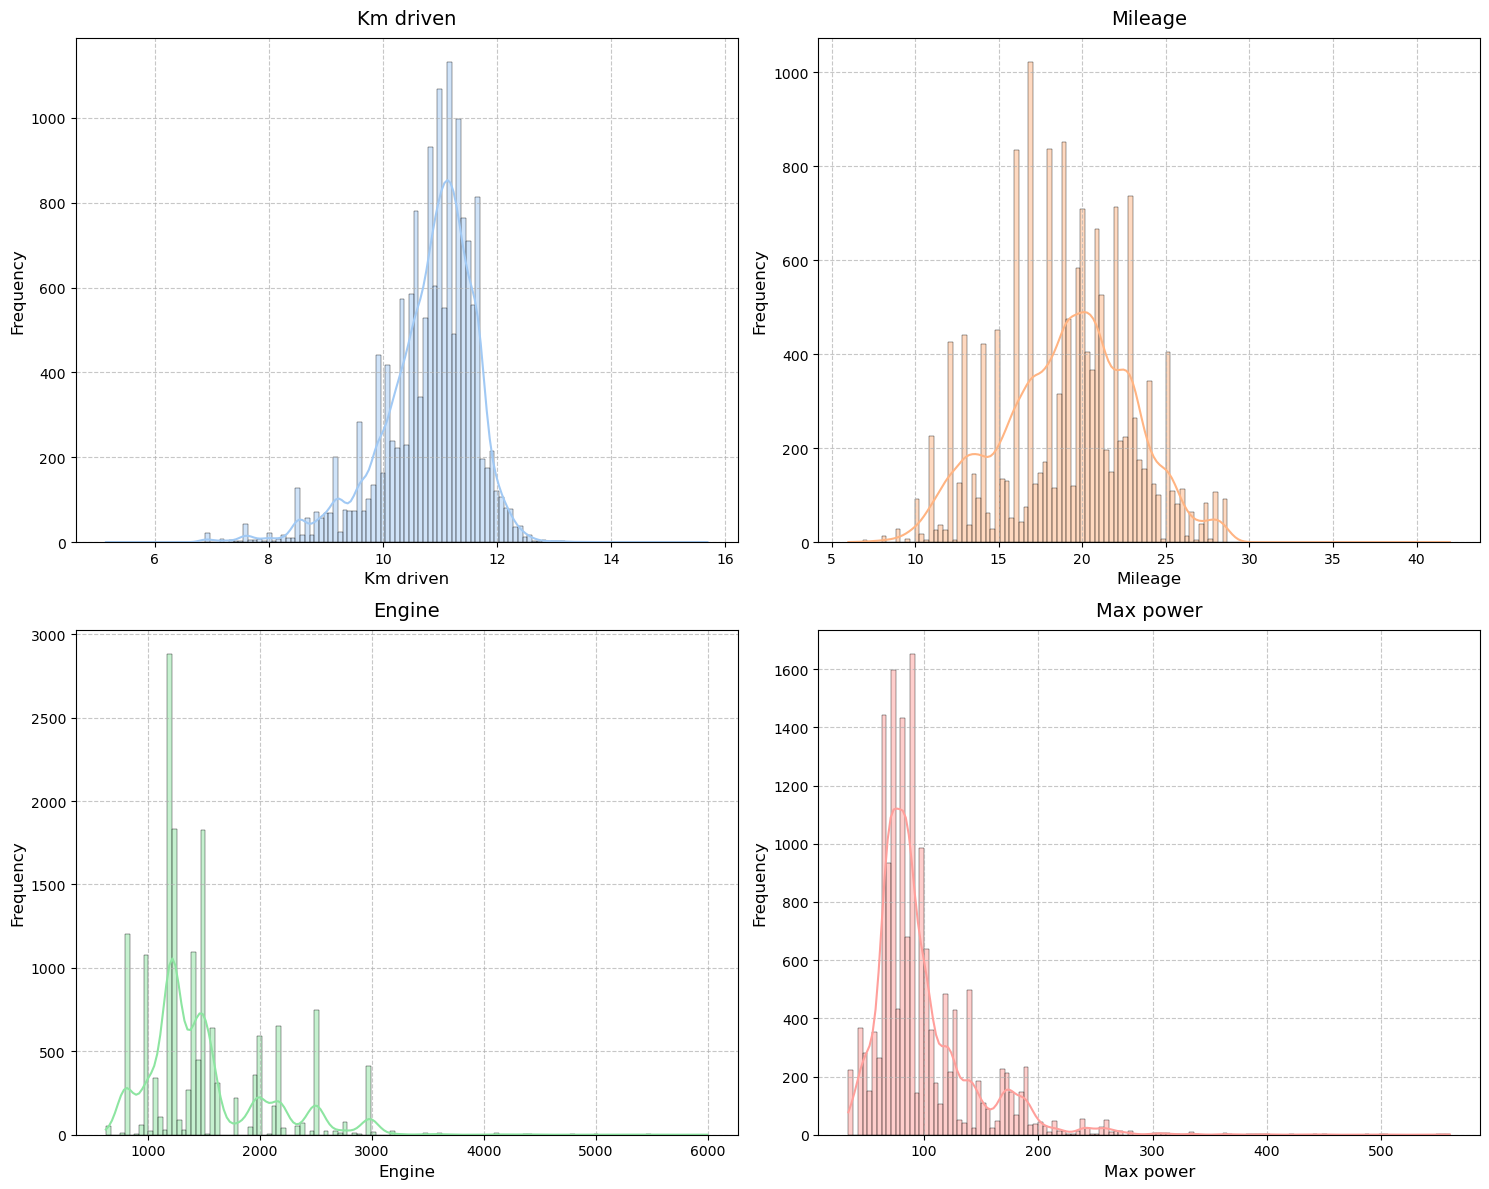

In [148]:
plot_histograms(preprocessed_df, continuous_raw_columns)

## 4.3 Correlation matrix

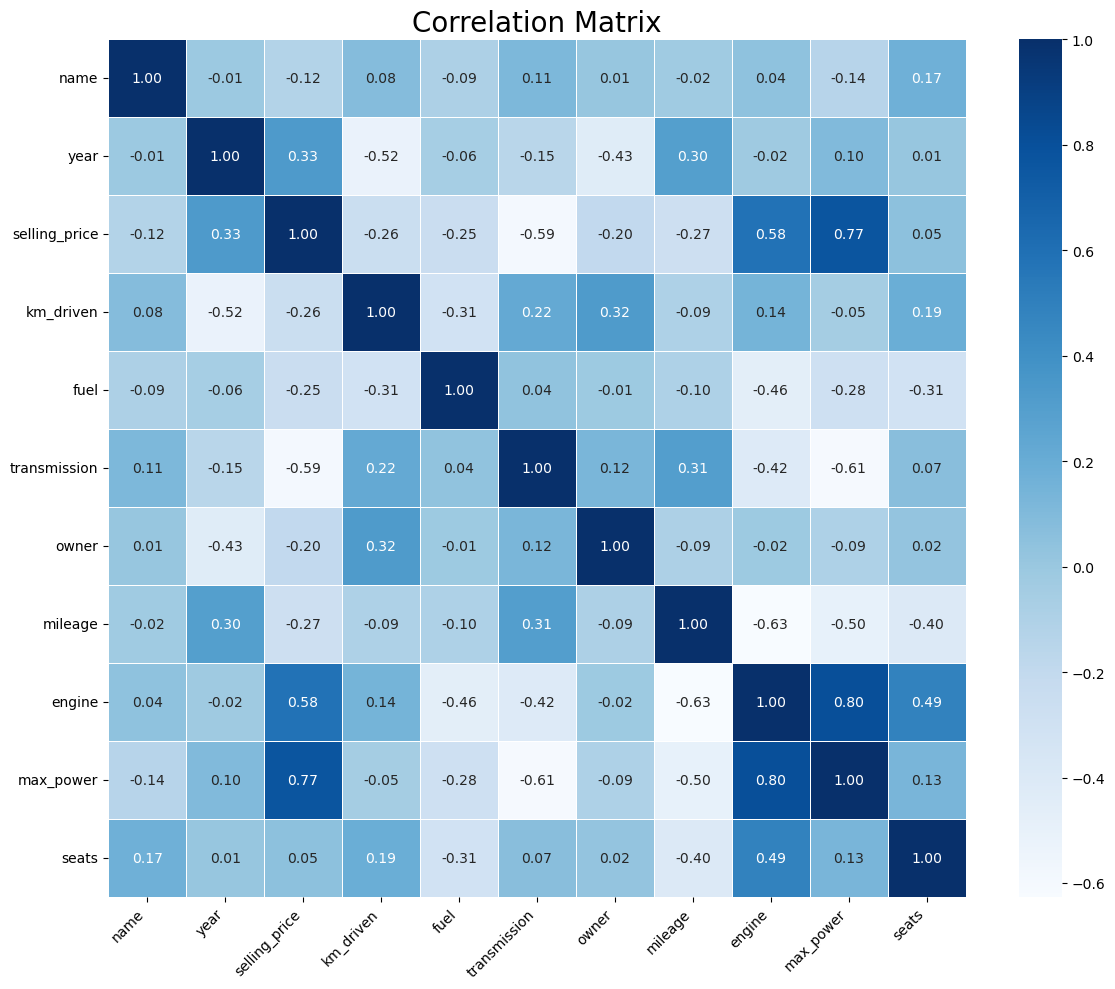

In [149]:
correlation_matrix = preprocessed_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', 
            annot_kws={"size": 10}, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

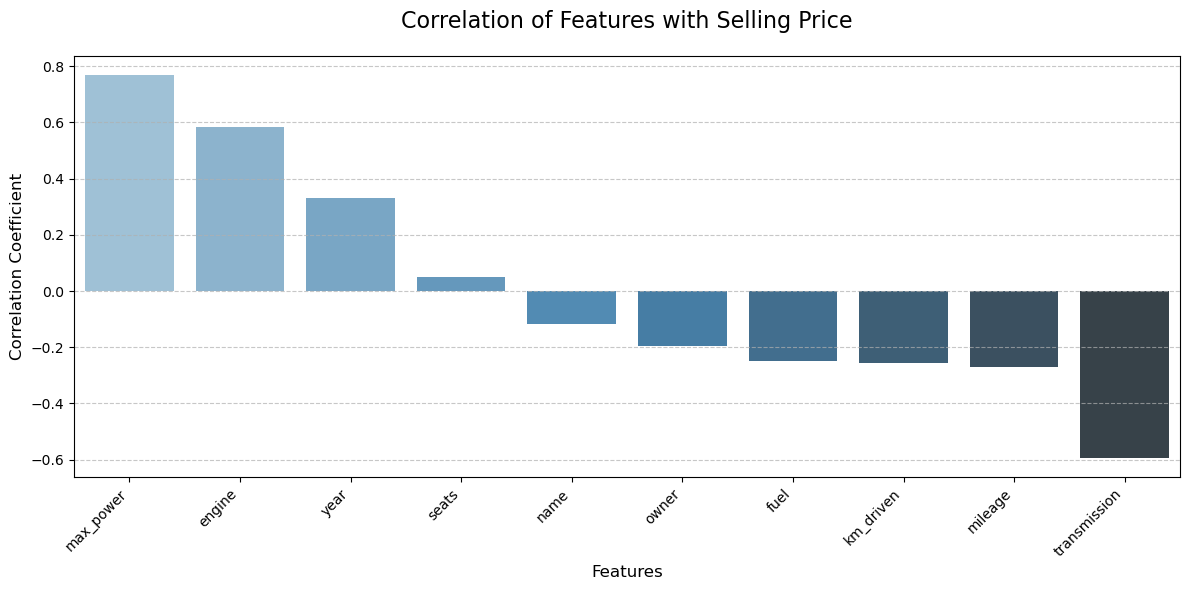

In [150]:
corr_with_price = correlation_matrix['selling_price'].drop('selling_price').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, 
            hue=corr_with_price.index, palette='Blues_d')

plt.title('Correlation of Features with Selling Price', fontsize=16, pad=20)

plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 4.4 Overview of categorical features

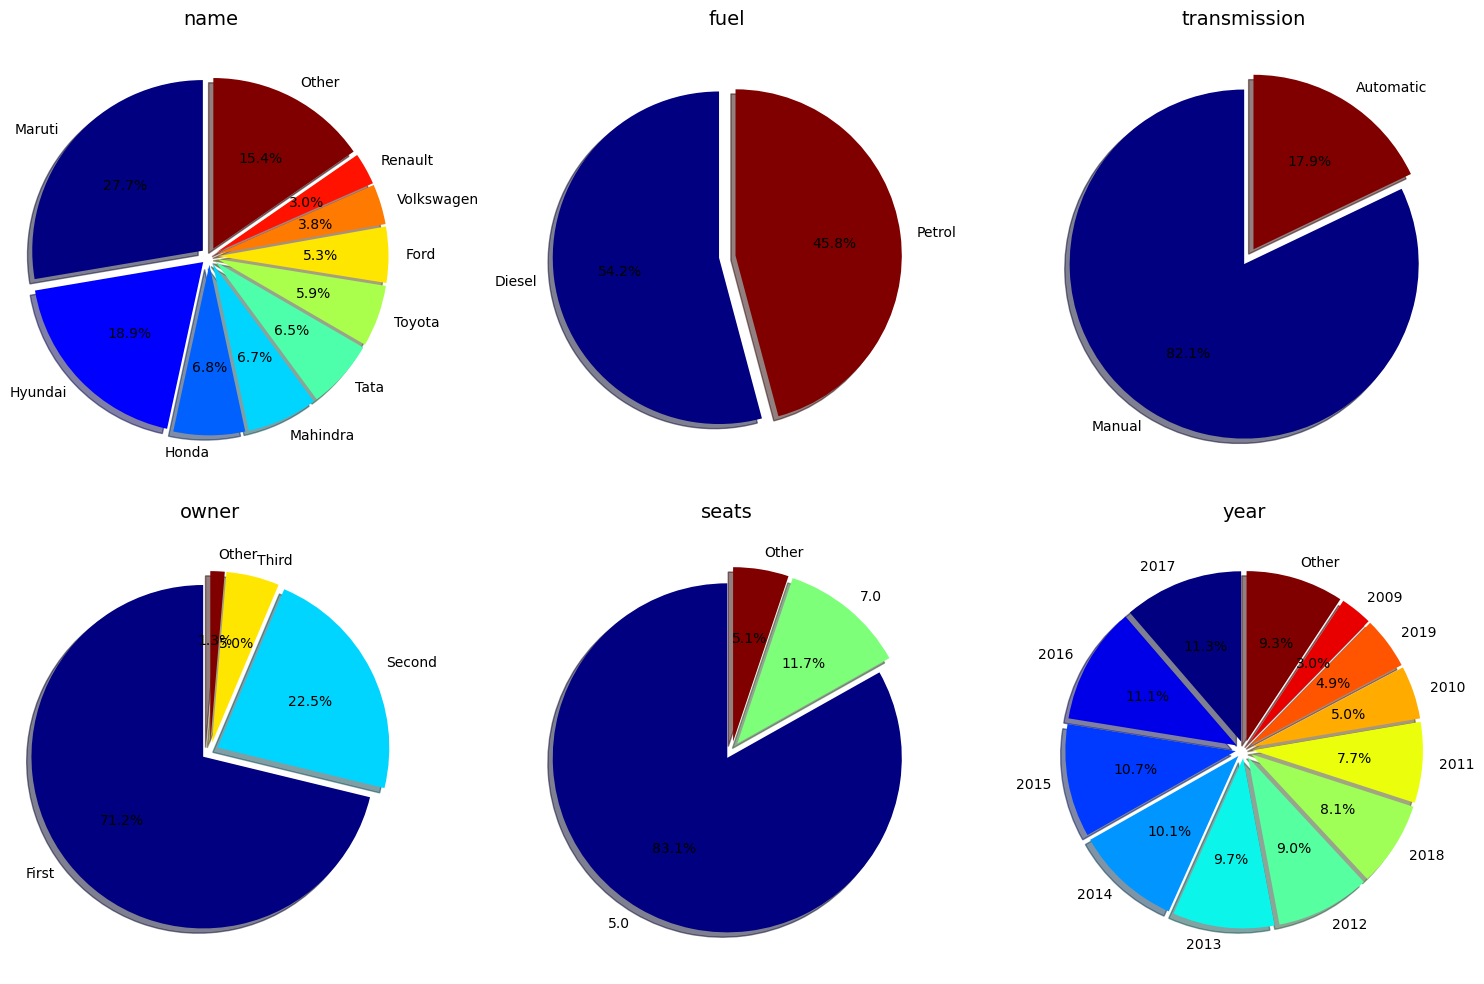

In [151]:
categorical_columns = ['name', 'fuel', 'transmission', 'owner', 'seats', 'year']
threshold = 3.0

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

def plot_pie_chart(df, column, ax, encoders):
    data = df[column]

    if column in encoders:
        data = encoders[column].inverse_transform(data)

    value_counts = pd.Series(data).value_counts()
    percentages = value_counts / value_counts.sum() * 100

    mask = percentages < threshold
    if mask.any():
        other_percentage = percentages[mask].sum()
        percentages = percentages[~mask]
        percentages['Other'] = other_percentage

    colors = plt.cm.jet(np.linspace(0, 1, len(percentages)))
    ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', 
           startangle=90, shadow=True, explode=[0.05] * len(percentages),
           colors=colors)
    ax.axis('equal')
    ax.set_title(f'{column}', fontsize=14)

for i, column in enumerate(categorical_columns):
    if column in preprocessed_df.columns and i < len(axes):
        plot_pie_chart(preprocessed_df, column, axes[i], label_encoders)

plt.tight_layout()
plt.show()

## 4.5 Modeling for car price prediction

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 4.5.1 Prepare train and test set

In [153]:
# Split data into input and label data
X = preprocessed_df.drop(columns = ['selling_price'])
Y = preprocessed_df['selling_price']
print(f'size of input data {X.shape}')
print(f'size of input data {Y.shape}')

size of input data (15947, 10)
size of input data (15947,)


In [154]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.12, random_state = 42)
print(f'x train size {x_train.shape}, x test size {x_test.shape}')
print(f'y train size {y_train.shape}, y test size {y_test.shape}')

x train size (14033, 10), x test size (1914, 10)
y train size (14033,), y test size (1914,)


In [155]:
# Normalize data (fit on train, transform on test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 4.5.2 Train models

In [156]:
# Create all models
models = {
    'Linear Regression': LinearRegression(), 
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

In [157]:
results = []
best_model = None
best_model_name = None
best_mse = float('inf')

# Iterate over each model in the models dictionary
for name, model in models.items():
    # Fit the model on the scaled training data
    model.fit(x_train_scaled, y_train)
    
    # Predict on training and testing datasets
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)
    
    # Calculate evaluation metrics for training data
    train_mse = mean_squared_error(y_train, train_pred)
    
    # Calculate evaluation metrics for testing data
    test_mse = mean_squared_error(y_test, test_pred)
    
    # Append all metrics to results list
    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    
    # Update the best model based on Test MSE
    if test_mse < best_mse:
        best_mse = test_mse
        best_model = model
        best_model_name = name

# Create a DataFrame to display results
df_results = pd.DataFrame(results)
df_results

,Model,Train MSE,Test MSE
0,Linear Regression,26.237465,24.974482
1,Ridge,26.237466,24.974252
2,Lasso,29.189708,26.664461
3,Decision Tree,0.025175,9.441385
4,KNN,5.368110,8.012114
5,Random Forest,0.938213,3.937704
6,SVM,14.234035,11.646946


### 4.5.3 Evaluate and choose the best model

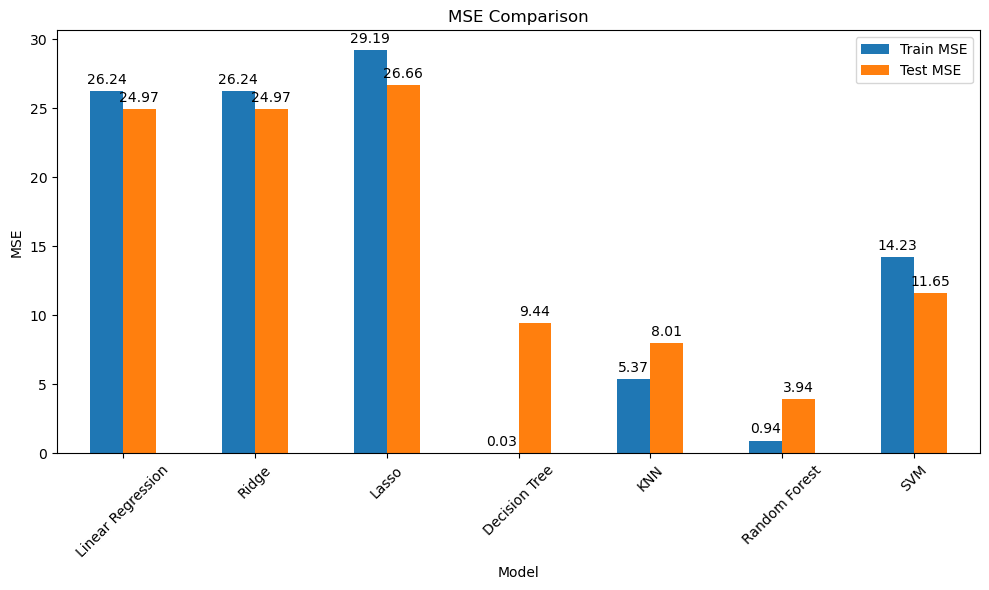

In [158]:
# Define the metric and corresponding DataFrame columns
metric_name, train_col, test_col = ('MSE', 'Train MSE', 'Test MSE')

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Set Model as index and select the current metric columns
df_plot = df_results.set_index('Model')[[train_col, test_col]]

# Plot the bar chart for the metric
df_plot.plot(kind='bar', ax=ax, rot=45, title=f"{metric_name} Comparison")

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Set the y-axis label
ax.set_ylabel(metric_name)

plt.tight_layout()
plt.show()


In [159]:
joblib.dump(best_model, "best_model.pkl")
print(f"Saved {best_model_name} to best_model.pkl")

Saved Random Forest to best_model.pkl


In [160]:
# Load model
loaded_model = joblib.load("best_model.pkl")

# Predict
predictions = loaded_model.predict(x_test_scaled)

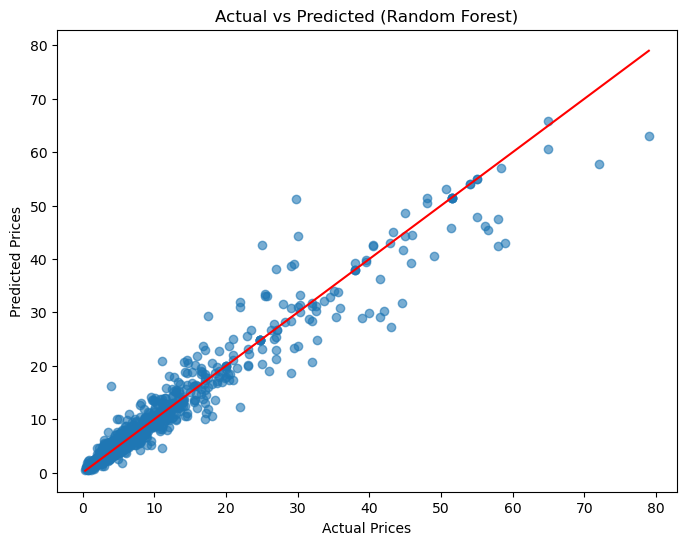

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


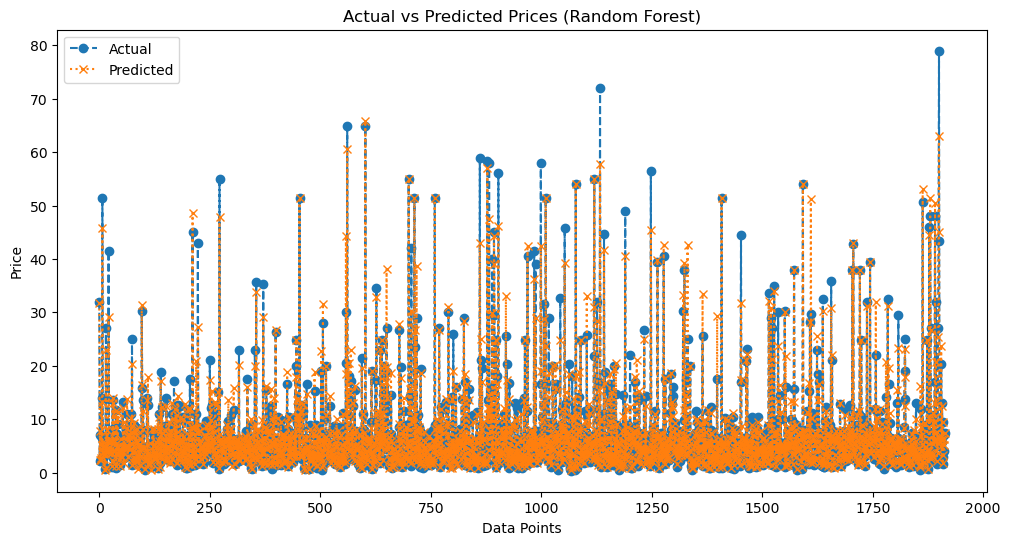

In [162]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
plt.plot(predictions, label="Predicted", marker='x', linestyle='dotted')
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.legend()
plt.show()


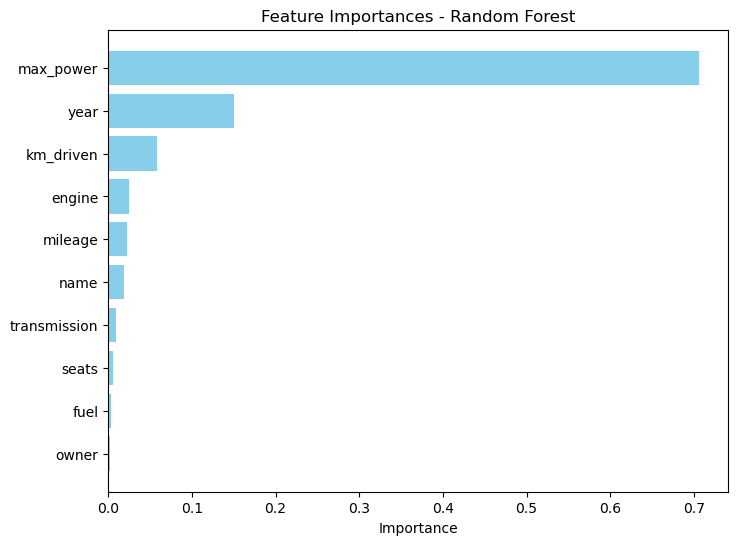

In [163]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    sorted_idx = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_features = feature_names[sorted_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importances - {best_model_name}")
    plt.xlabel("Importance")
    plt.show()
else:
    print(f"The model {best_model_name} does not have the 'feature_importances_' attribute")



# 5. Conclusion

Through data analysis and modeling, we identified that **max_power** has the highest influence on car prices. This suggests that vehicles with higher engine power tend to be priced higher. Other factors like year (car age), kilometers driven, and engine also contribute to price variations, but **max_power** remains the most significant determinant.

By leveraging this insight, potential buyers and sellers can make more informed decisions, and businesses can optimize their pricing strategies to align with market trends. Further improvements can be made by incorporating additional features or experimenting with more advanced machine learning models to enhance prediction accuracy.